In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np
import copy

In [2]:
n=10
def random_particules_v2(n):
    X=[]
    Y=[]
    poids_particules={}
    for i in range(n):
        x,y = np.random.random(),np.random.random()
        X.append(x)
        Y.append(y)
        
        if np.random.rand()<=(1/3):
            poids_particules[(x,y)] = 1
        elif np.random.rand()<=(1/3):
            poids_particules[(x,y)] = 10
        else :
            poids_particules[(x,y)] = 13
        
    return X,Y,poids_particules

In [3]:
random_particules_v2(4)

([0.7042409676625755,
  0.3877451336307072,
  0.9539598100868399,
  0.7622664128070958],
 [0.08056349877339353,
  0.1948955943873535,
  0.8925391722902533,
  0.9232572838385249],
 {(0.3877451336307072, 0.1948955943873535): 1,
  (0.7042409676625755, 0.08056349877339353): 13,
  (0.7622664128070958, 0.9232572838385249): 13,
  (0.9539598100868399, 0.8925391722902533): 1})

In [4]:
def direction(X,Y,v):
    Xdir=[]
    Ydir=[]
    for i in range(len(X)):
        if np.random.rand()>0.5:
            Xdir.append(v)
        else:
            Xdir.append(-v)
    for i in range(len(Y)):
        if np.random.rand()>0.5:
            Ydir.append(v)
        else:
            Ydir.append(-v)
        
        
    return Xdir,Ydir

In [5]:
def update_particules(X,Y,v,poids_particules,Xdir,Ydir):
    
    poids_particules2=copy.deepcopy(poids_particules)
    
    Xnew=[]
    Ynew=[]
    i=0
    for x0,x1,y0,y1 in zip(X,Xdir,Y,Ydir):
        i+=1
        #REBOND
        if x0+x1 >= 1:
            new_x = 1
            Xnew.append(new_x)
            Xdir[i-1]=-x1
        elif x0+x1<=0:
            new_x = 0
            Xnew.append(new_x)
            Xdir[i-1]=-x1                
        else:
            new_x = x0+x1
            Xnew.append(new_x)
            
        #REBOND
        if y0+y1>=1:
            new_y = 1
            Ynew.append(new_y)
            Ydir[i-1]=-y1
        elif y0+y1<=0:
            new_y = 0
            Ynew.append(new_y)
            Ydir[i-1]=-y1         
        else:
            new_y = y0+y1
            Ynew.append(new_y)
        
        poids_particules2[(new_x,new_y)] = poids_particules2[(x0,y0)]
        
        del poids_particules2[(x0,y0)]
        
    return Xnew,Ynew,poids_particules2,Xdir,Ydir

In [6]:
def fusion_v4(X,Y,poids_particules):
    
    X2=[]
    Y2=[]
    poids_particules2=copy.deepcopy(poids_particules)
    weight_set = set([2,11,12,20,23,30,33,24,16])  # numero atomique 
    for xA,yA in zip(X,Y):
        for xB,yB in zip(X,Y):
            if xA != xB and yA != yB:
                if np.around(xA,1) == np.around(xB,1) and np.around(yA,1) == np.around(yB,1):
                    new_weight = poids_particules[(xA,yA)] + poids_particules[(xB,yB)]
                    if new_weight in weight_set:
                        poids_particules2[(xA,yA)] = new_weight                        
                X2.append(xA)
                Y2.append(yA)
    
    for k in poids_particules2:
        if k[0] not in X2 and k[1] not in Y2:
            del poids_particules2[k]
                            
    return X2,Y2,poids_particules2

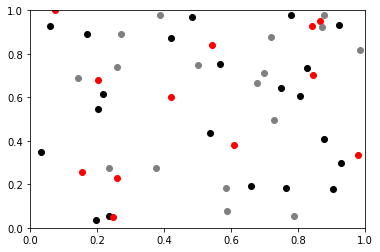

t =  0


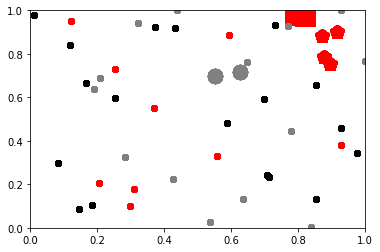

t =  1


KeyError: (0.8395055458130205, 0.0033691401258915538)

In [7]:
t=50
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

X,Y,poids_particules=random_particules_v2(50)

for x0,y0 in zip(X,Y):
        assert (x0,y0) in poids_particules
        if poids_particules[(x0,y0)] == 1:
            plt.scatter(x0,y0,c="gray")
        elif poids_particules[(x0,y0)] == 10:
            plt.scatter(x0,y0,c="red")
        elif poids_particules[(x0,y0)] == 13:
            plt.scatter(x0,y0,c="black")

#plt.savefig("0.png")
plt.show()

Xdir,Ydir = direction(X,Y,0.05)
          
for i in range(t):
    print("t = ",i)
    
    for x0,y0 in zip(X,Y):
        assert (x0,y0) in poids_particules
        
    X,Y,poids_particules,Xdir,Ydir = update_particules(X,Y,0.05,poids_particules,Xdir,Ydir)
    
    for x0,y0 in zip(X,Y):
        assert (x0,y0) in poids_particules
    
    X,Y,poids_particules=fusion_v4(X,Y,poids_particules)
    
    for x0,y0 in zip(X,Y):
        assert (x0,y0) in poids_particules
    
    for x0,y0 in zip(X,Y):
        #print(X)
        #print(Y)
        #print(poids_particules)
        if poids_particules[(x0,y0)] == 1:
            plt.scatter(x0,y0,c="gray")
        elif poids_particules[(x0,y0)] == 10:
            plt.scatter(x0,y0,c="red")
        elif poids_particules[(x0,y0)] == 13:
            plt.scatter(x0,y0,c="black")
    
        elif poids_particules[(x0,y0)] == 2:
            plt.scatter(x0,y0,c="gray",s=200)
        
        elif poids_particules[(x0,y0)] == 11:
            plt.scatter(x0,y0,c="red",s=400,marker='s')
    
        elif poids_particules[(x0,y0)] == 24:#(xA,yA)#0.480804576259627
            plt.scatter(x0,y0,c="red",s=800,marker='s')
    
        elif poids_particules[(x0,y0)] == 20:
            plt.scatter(x0,y0,c="red",s=200)
            
        elif poids_particules[(x0,y0)] == 30:
            plt.scatter(x0,y0,c="red",s=400)
            
        elif poids_particules[(x0,y0)] == 23:
            plt.scatter(x0,y0,c="red",s=200,marker='p')
            
        elif poids_particules[(x0,y0)] == 33:
            plt.scatter(x0,y0,c="red",s=400,marker='p')
        elif poids_particules[(x0,y0)] == 12:
            plt.scatter(x0,y0,c="blue",s=400,marker='X')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
    
    
  
    #plt.savefig(str(i+1)+".png")
    plt.show()

In [ ]:
(0, 0.05386341684468385) in poids_particules

In [8]:
n=10
def random_particules_v3(n):
    N=[]
    for i in range(n):
        i=i+1
        N.append(i)
    position={}
    typ= {}
    for i in range(n):
        x,y = np.random.random(),np.random.random()
        position[i]=(x,y)
        
        if np.random.rand()<=(1/3):
            typ[i] = 1
        elif np.random.rand()<=(1/3):
            typ[i] = 10
        else :
            typ[i] = 13
        
    return N,position,typ

In [9]:
N=[]
for i in range(10):
    i=i+1
    N.append(i)

In [10]:
N

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [11]:
N,position,typ = random_particules_v3(4)

In [12]:
position

{0: (0.9573698622338043, 0.7523037153075077),
 1: (0.20330769268106574, 0.8048853375936761),
 2: (0.20776109297187006, 0.6906800966530314),
 3: (0.4658603595188874, 0.04499893500314878)}

In [13]:
(a,b) = position[2]

In [14]:
a

0.20776109297187006

In [15]:
def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1])
sum_tuple((4,5),(2,1))

(6, 6)

In [16]:
def mult_tuple(a,b):
    return (a[0]*b[0],a[1]*b[1])


In [17]:
mult_tuple((4,5),(2,1))

(8, 5)

In [18]:
def direction_v3(N,position,v):
    direction={}
    
    for i in range(len(N)):
        if np.random.rand()<0.25:
            direction[i]=(v,v)
            
        elif np.random.rand()<0.25:
            direction[i]=(-v,-v)
            
        elif np.random.rand()<0.25:
            direction[i]=(v,-v)
            
        else: 
            direction[i]=(-v,v)
        
        
        
    return direction

In [46]:
def update_particules_v3(N,position,direction):
    
    
    for i in N:
        for e in position:
            position[e]= sum_tuple(position[e],direction[e])
    for i in position:
        (a,b)=position[i]              
        if a>= 0:
            a=0 
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,1))
        
        if b>= 0:
            b=0
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(1,-1))
        
        if a>= 1:
            a=1 
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(1,-1))
        
        if b>= 1:
            b=1
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(1,-1))
            
    
             
    return N,position, direction

In [20]:
def fusion_v4(N,position,direction,typ):
    
    for i in N:
        for e in position:
            
    X2=[]
    Y2=[]
    poids_particules2=copy.deepcopy(poids_particules)
    weight_set = set([2,11,12,20,23,30,33,24,16])  # numero atomique 
    for xA,yA in zip(X,Y):
        for xB,yB in zip(X,Y):
            if xA != xB and yA != yB:
                if np.around(xA,1) == np.around(xB,1) and np.around(yA,1) == np.around(yB,1):
                    new_weight = poids_particules[(xA,yA)] + poids_particules[(xB,yB)]
                    if new_weight in weight_set:
                        poids_particules2[(xA,yA)] = new_weight                        
                X2.append(xA)
                Y2.append(yA)
    
    for k in poids_particules2:
        if k[0] not in X2 and k[1] not in Y2:
            del poids_particules2[k]
                            
    return X2,Y2,poids_particules2

IndentationError: expected an indented block (<ipython-input-20-0c4c1c17a0c9>, line 6)

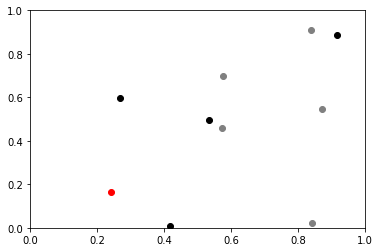

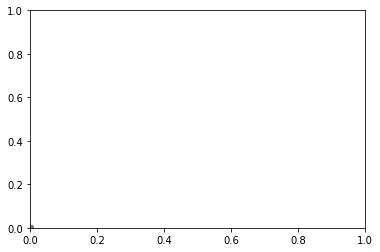

In [53]:
t=10
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

N,position,typ = random_particules_v3(10)

for i in N:
    (a,b)=position[i-1]
    if typ[i-1]==1:
        plt.scatter(a,b,c="gray")
    if typ[i-1]==10:
        plt.scatter(a,b,c="red")
    if typ[i-1]==13:
        plt.scatter(a,b,c="black")
#plt.savefig("0.png")
plt.show()
        
direction=direction_v3(N,position,0.05)

for i in range(t):
    N,position,direction=update_particules_v3(N,position,direction)
        
    for e in N:
        
        (a,b)=position[e-1]
        if typ[e-1]==1:
            plt.scatter(a,b,c="gray")
        if typ[e-1]==10:
            plt.scatter(a,b,c="red")
        if typ[e-1]==13:
            plt.scatter(a,b,c="black")

        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
#plt.savefig(str(i+1)+".png")
plt.show()
  